In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense


In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv(url, names=column_names, na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

df = df.fillna(df.mean())
mms = MinMaxScaler()
mms.fit(df)
df = mms.transform(df)
df = pd.DataFrame(df)

In [ ]:
Y =  df.iloc[:,0].values
X = df.iloc[:,1:].values
X.shape

(398, 7)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=303)


In [ ]:
model = Sequential()
model.add(Dense(32,activation='relu',input_shape=(7,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                256       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 801 (3.13 KB)
Trainable params: 801 (3.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss = 'BinaryCrossentropy',optimizer='sgd',metrics=['accuracy'])

In [ ]:
trained = model.fit(x_train, y_train,
epochs=500,batch_size=32,validation_split = 0.2,
verbose=1)

Epoch 1/500
8/8 [==============================] - 2s 52ms/step - loss: 0.0685 - mse: 0.0685 - val_loss: 0.0663 - val_mse: 0.0663
Epoch 2/500
8/8 [==============================] - 0s 12ms/step - loss: 0.0626 - mse: 0.0626 - val_loss: 0.0607 - val_mse: 0.0607
Epoch 3/500
8/8 [==============================] - 0s 15ms/step - loss: 0.0579 - mse: 0.0579 - val_loss: 0.0558 - val_mse: 0.0558
Epoch 4/500
8/8 [==============================] - 0s 12ms/step - loss: 0.0537 - mse: 0.0537 - val_loss: 0.0515 - val_mse: 0.0515
Epoch 5/500
8/8 [==============================] - 0s 14ms/step - loss: 0.0500 - mse: 0.0500 - val_loss: 0.0478 - val_mse: 0.0478
Epoch 6/500
8/8 [==============================] - 0s 16ms/step - loss: 0.0467 - mse: 0.0467 - val_loss: 0.0445 - val_mse: 0.0445
Epoch 7/500
8/8 [==============================] - 0s 10ms/step - loss: 0.0438 - mse: 0.0438 - val_loss: 0.0415 - val_mse: 0.0415
Epoch 8/500
8/8 [==============================] - 0s 17ms/step - loss: 0.0411 - mse: 0.04

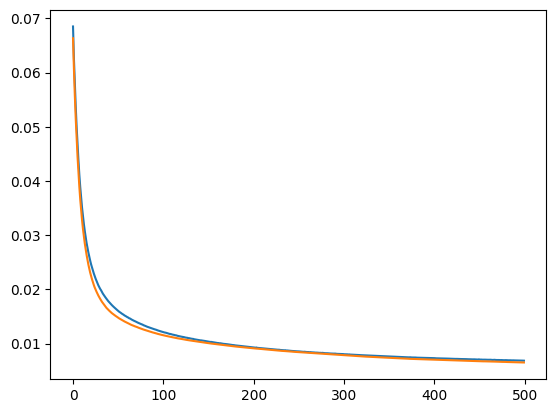

In [ ]:

plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])


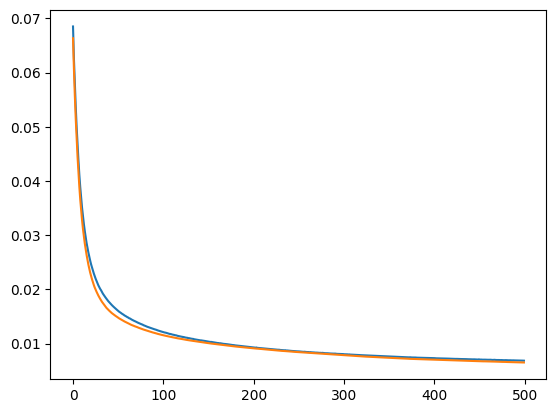

In [ ]:
plt.plot(trained.history['mse'])
plt.plot(trained.history['val_mse'])


In [ ]:
prediction = model.predict(x_test)


3/3 [==============================] - 0s 6ms/step


In [ ]:
score = model.evaluate(x_test, y_test)
score

3/3 [==============================] - 0s 5ms/step - loss: 0.0038 - mse: 0.0038


[0.003807034809142351, 0.003807034809142351]